# Time Series EDA

- Time Series Train-Test Split
    1. Human-based
    1. Percentage Based
    1. Cross Validate Splits
- 10 Weird Time Series Visualizations to Impress Your Friends and Family (Doctors Hate Her)
    1. Blow off the time series
    1. y over time
    1. y averaged over various periods over time
    1. change in y over time
    1. Seasonal Plot
    1. Seasonal Subseries Plot
    1. Lag Plot
    1. Autocorrelation Plot
    1. Seasonal Decomposition
    1. Area Plots
- Aside: working with dates in matplotlib
- Aside: `strftime`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# plotting defaults
plt.rc('figure', figsize=(11, 5))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

url = 'https://gist.githubusercontent.com/ryanorsinger/0ec766c66f4089bdcbc1d4fb294a3394/raw/197c1f0d7b55a45f29437811bc73d9c4ef8af647/sa_temps.csv'
df = pd.read_csv(url, index_col='datetime', parse_dates=True).sort_index()
# converting the units of the data we are ingesting
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
df.head()

df.shape[0]

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00


45252

In [2]:
df.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


In [3]:
df.size, df.shape

(45252, (45252, 1))

In [4]:
df.tail(2)

,temp
datetime,
2017-11-29 23:00:00,71.834
2017-11-30 00:00:00,65.966


In [5]:
df.temp.describe()

count    45252.000000
mean        69.144163
std         14.946638
min         17.420000
25%         59.810000
50%         71.661650
75%         79.412000
max        104.918000
Name: temp, dtype: float64

- **seasonality**: a repeated cycle in the data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality
- **trend**: long term upwards or downwards movement
- **cycle**: Some arbitrary chunk of time, usually longer than a season, or consists of multiple seasons

In [6]:
# double check that my index is sorted
df = df.sort_index()

## Train-Test Split

- Ideally all splits contain a season
- Human-based: use the last year as test
- Percentage based: use the last 20% as test
- Cross Validate: break data up into slices and use successive slices as train and test repeatedly (`sklearn.model_selection.TimeSeriesSplit`)
    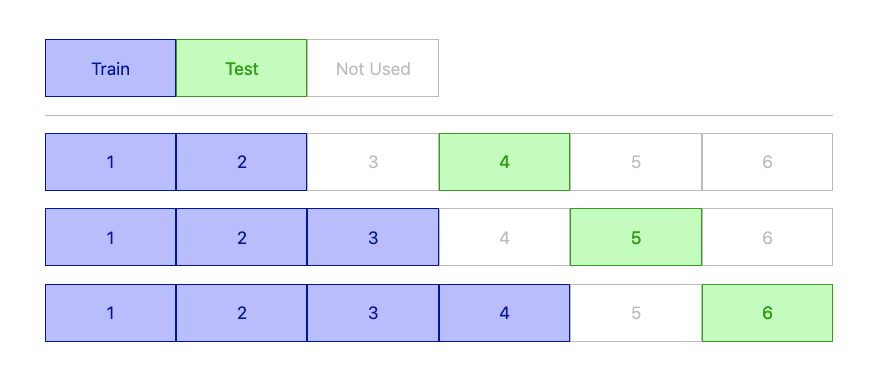

In [7]:
# if we want to examine the information 
# that we have and begin to make assessments on it,
# we will start off with a blind proportional split

In [8]:
# If we start off with a basic 70% train set here:

In [9]:
# define a proportion for our split:
train_size = 0.7

In [10]:
train_index = round(train_size * df.shape[0])

In [12]:
# everything up to that point?
# this breaks, we have a time series index!
# train = df[train_index]

In [13]:
train_index

31676

In [14]:
df

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
...,...
2017-11-29 20:00:00,70.790000
2017-11-29 21:00:00,72.806000
2017-11-29 22:00:00,73.202000


In [15]:
train = df.reset_index()[:train_index]
test = df.reset_index()[train_index:]

In [16]:
train.tail(1)

,datetime,temp
31675,2016-05-13 08:00:00,73.886


In [17]:
test.head(1)

,datetime,temp
31676,2016-05-13 09:00:00,73.112


In [18]:
train = train.set_index('datetime')
test = test.set_index('datetime')

In [19]:
# defining train and test by the years instead:
# (either way is perfectly valid)
train = df.loc[:'2016']

In [20]:
df.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


In [21]:
df.loc[:'2016'].tail()

,temp
datetime,
2016-12-31 19:00:00,63.230
2016-12-31 20:00:00,68.216
2016-12-31 21:00:00,70.664
2016-12-31 22:00:00,71.348
2016-12-31 23:00:00,71.600


In [22]:
test = df.loc['2017':]

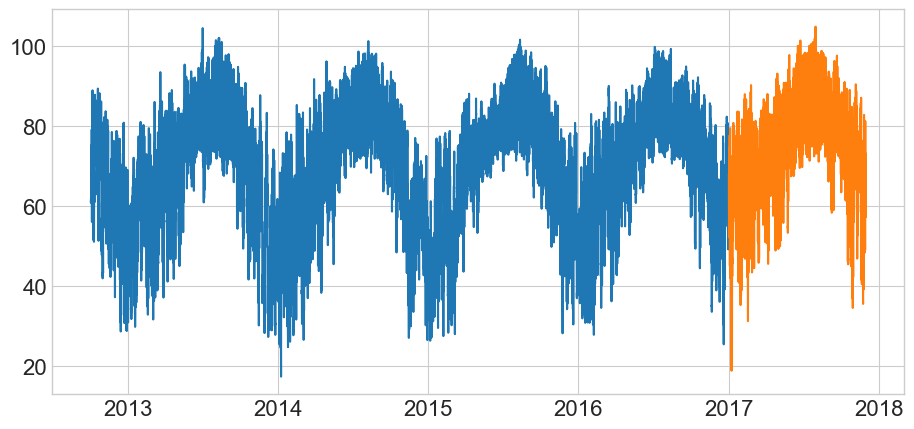

In [23]:
plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)
plt.show()

In [24]:
# defining a target:
# pretty easy, theres only one thing here, temp
y = train.temp

<Axes: >

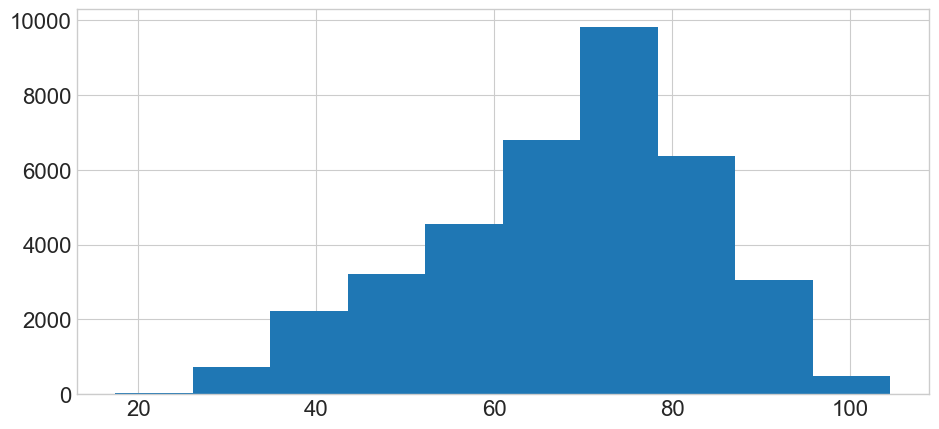

In [25]:
# blowing off the time series element:
# what does the dist of temperature look like here?
train.temp.hist()

<Axes: xlabel='datetime'>

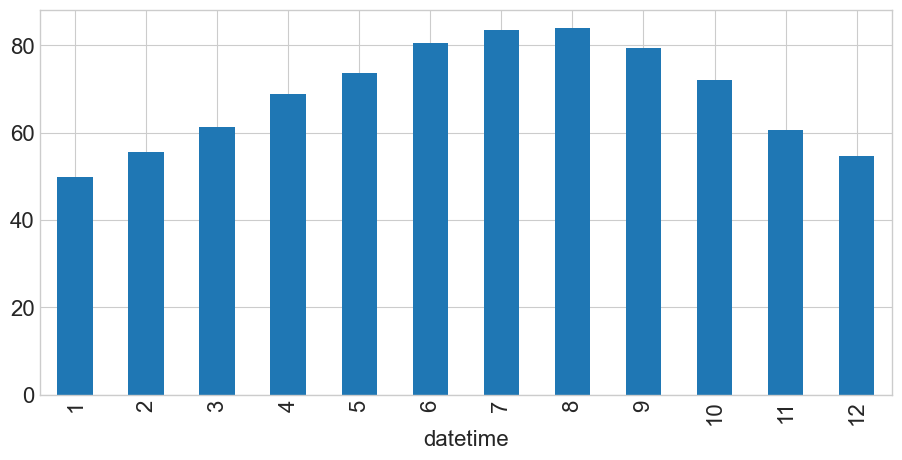

In [26]:
# if i take the months out of the datetime index
# group by those months
# grab the average temperature with the mean() method
# and then chain it into plotting,
# I can get an assessment of what the average temp 
# looks like across months
train.groupby(train.index.month).temp.mean().plot.bar()

In [27]:
train['weekday'] = train.index.day_name()

<Axes: xlabel='weekday'>

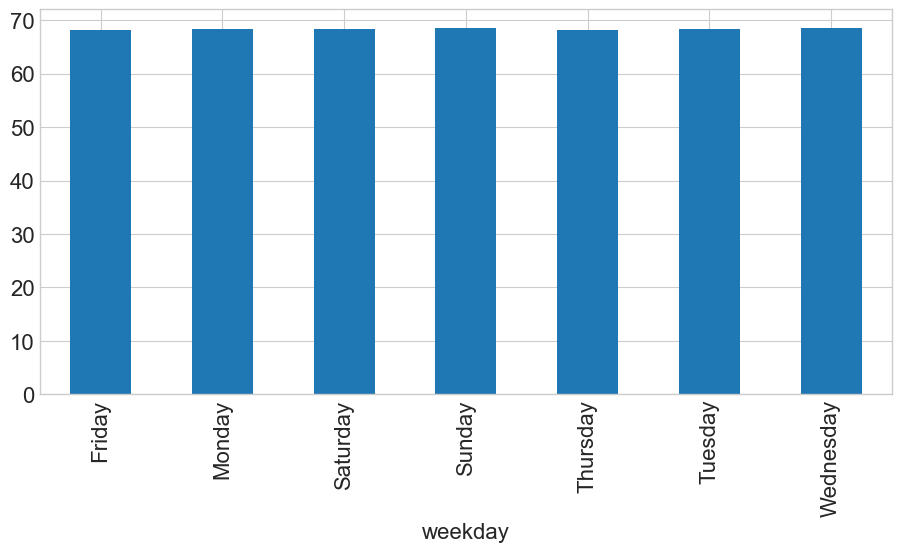

In [28]:
train.groupby('weekday').temp.mean().plot.bar()

<Axes: xlabel='weekday', ylabel='temp'>

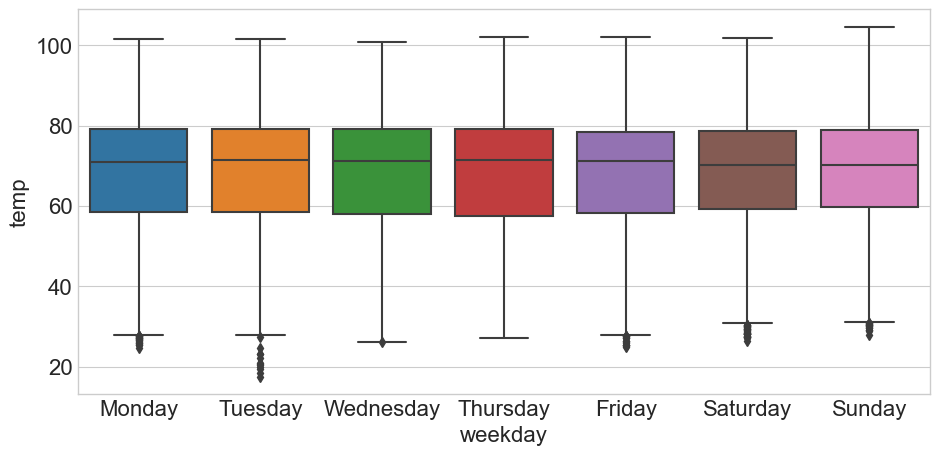

In [29]:
# distribution of this information on a day of week basis?

sns.boxplot(data=train, x='weekday', y='temp')

<Axes: xlabel='datetime'>

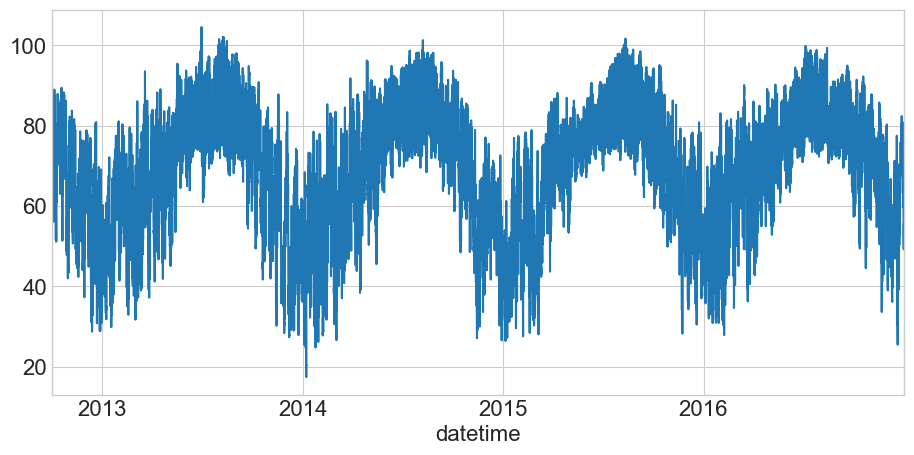

In [30]:
y.plot()

<Axes: xlabel='datetime'>

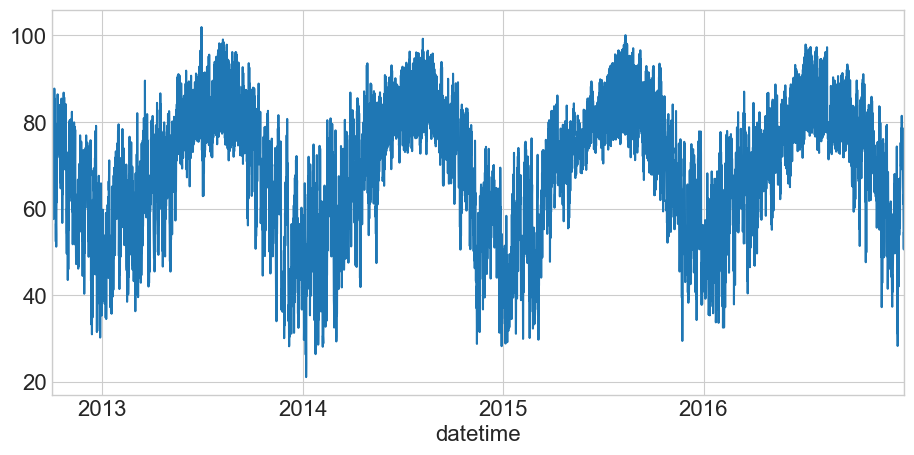

In [31]:
# this info resampled?
y.resample('6H').mean().plot()

<Axes: xlabel='datetime'>

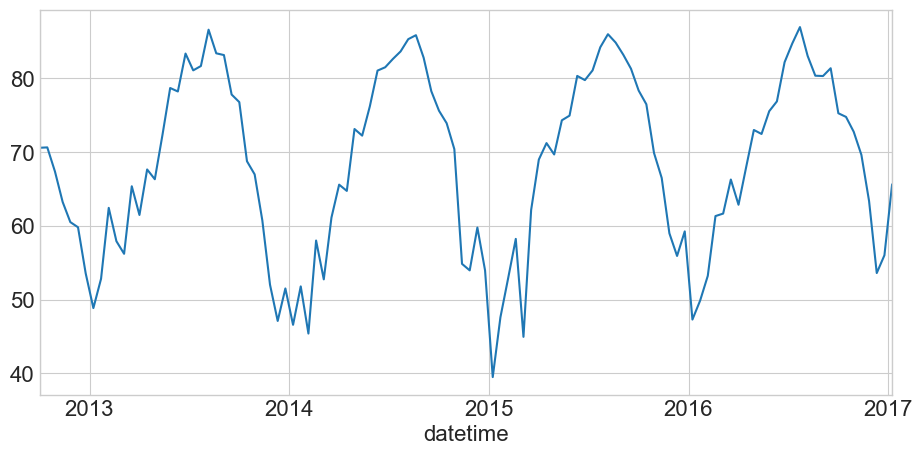

In [32]:
y.resample('2W').mean().plot()

<Axes: xlabel='datetime'>

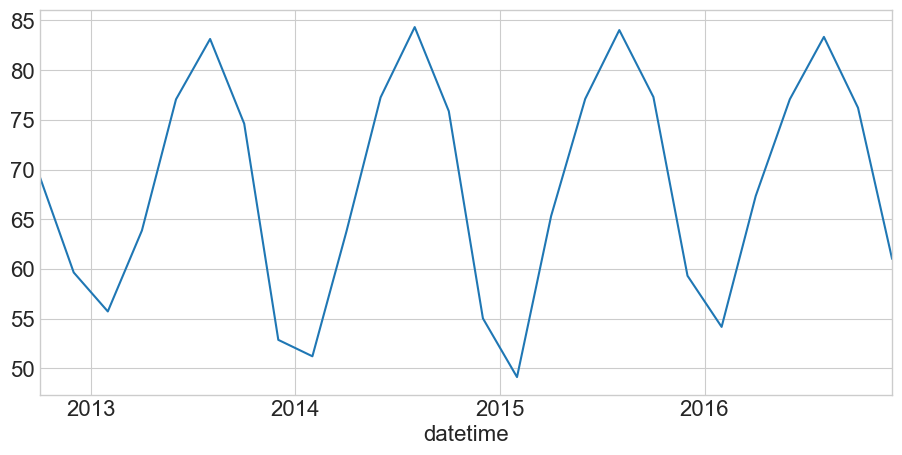

In [33]:
y.resample('2M').mean().plot()

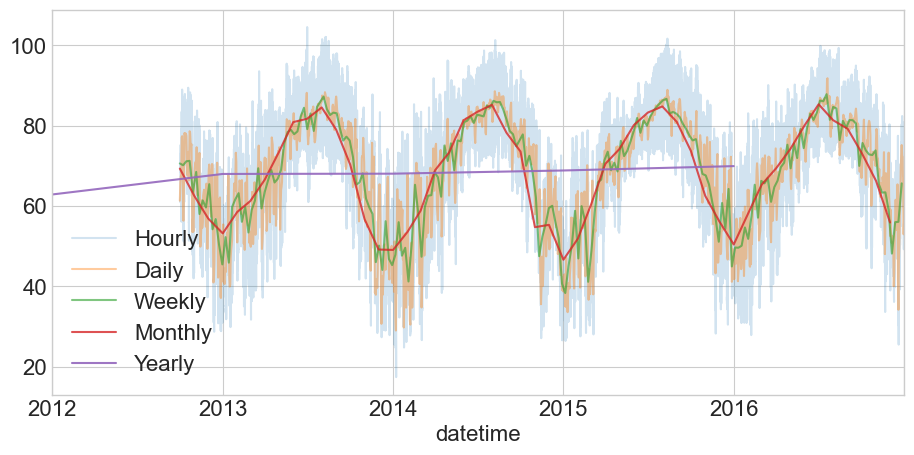

In [34]:
y.plot(alpha=0.2, label='Hourly')
y.resample('D').mean().plot(alpha=0.4, label='Daily')
y.resample('W').mean().plot(alpha=0.6, label='Weekly')
y.resample('M').mean().plot(alpha=0.8, label='Monthly')
y.resample('Y').mean().plot(alpha=0.9, label='Yearly')
plt.legend()
plt.show()

In [35]:
# If we want to plot the change in the temperature over time?

In [36]:
# if we look at the mean month values
# next to the diff values,
# we can see that diff gives us the subtracted delta of the last
# mean value to the prior
pd.concat([y.resample('M').mean(), 
           y.resample('M').mean().diff()], axis=1).head()

,temp,temp
datetime,,
2012-10-31,69.318705,NaN
2012-11-30,62.521575,-6.797130
2012-12-31,56.860014,-5.661561
2013-01-31,53.192333,-3.667681
2013-02-28,58.522799,5.330466


<Axes: xlabel='datetime'>

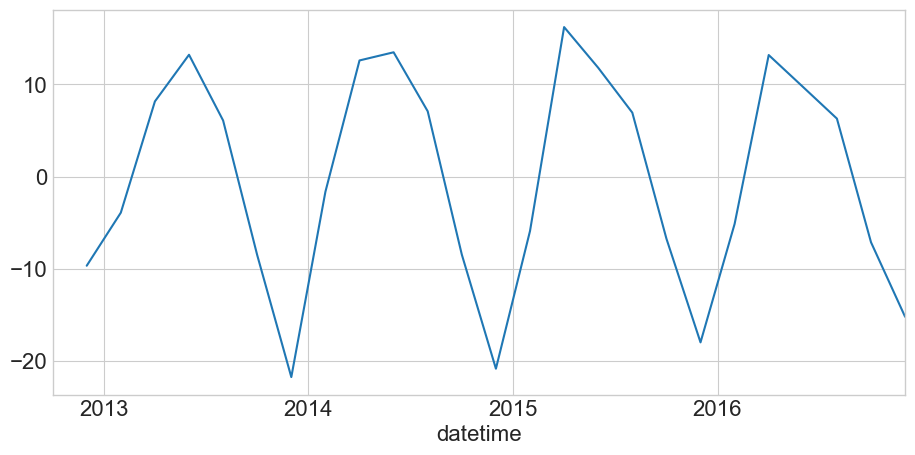

In [37]:
y.resample('2M').mean().diff().plot()

In [38]:
# y.resample('M').mean().diff(12).head(13)

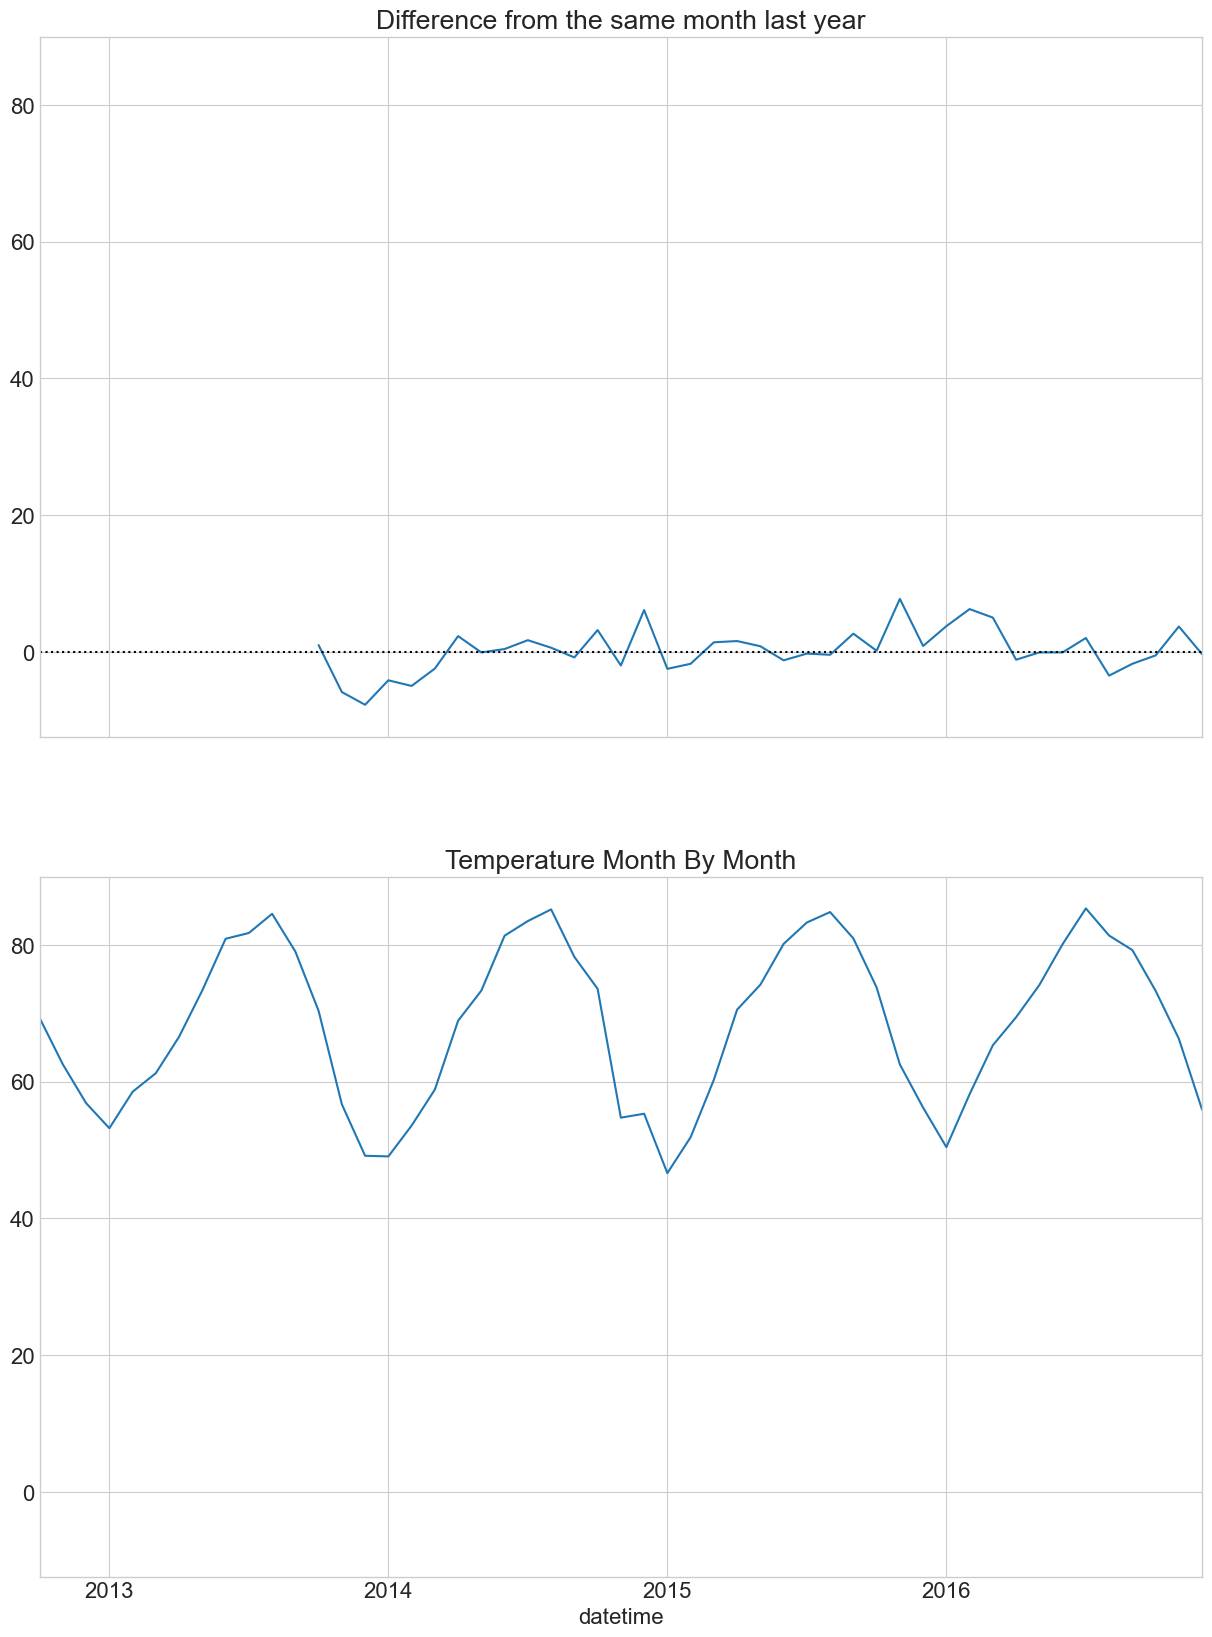

In [39]:
fig, (ax1, ax2) = plt.subplots(2,1,
                              sharex=True,
                              sharey=True,
                                figsize=(15,20))
ax = y.resample('M').mean().diff(12).plot(ax=ax1)
# I can get an automated version of how long
# I would want my horizontal line to go
# based on some star unpacking *ax1.get_xlim()
ax1.hlines(0, *ax1.get_xlim(), color='black', linestyle=':')
ax1.set(title='Difference from the same month last year')
y.resample('M').mean().plot(ax=ax2)
ax2.set(title='Temperature Month By Month')
plt.show()

### Seasonal Plotting:

In [40]:
# If I want to make some examinations on a month
# to month basis by year, I could do a two-level group by
# and get the averages, but this may be hard to plot
# is there a way to make this easier?
y.groupby([y.index.year, y.index.month]).mean().head()

datetime  datetime
2012      10          69.318705
          11          62.521575
          12          56.860014
2013      1           53.192333
          2           58.522799
Name: temp, dtype: float64

In [41]:
y.groupby([y.index.month, y.index.year]).mean().unstack()

datetime,2012,2013,2014,2015,2016
datetime,,,,,
1,NaN,53.192333,49.072897,46.631940,50.427347
2,NaN,58.522799,53.579080,51.874683,58.165749
3,NaN,61.244479,58.842459,60.277705,65.323011
4,NaN,66.569717,68.908933,70.526879,69.415316
5,NaN,73.358529,73.311970,74.169747,74.129780
6,NaN,80.885728,81.337658,80.135967,80.097570
7,NaN,81.731819,83.476876,83.264325,85.325640
8,NaN,84.534117,85.178102,84.789859,81.357023
9,NaN,79.016805,78.238621,80.938208,79.233476


<Axes: xlabel='datetime'>

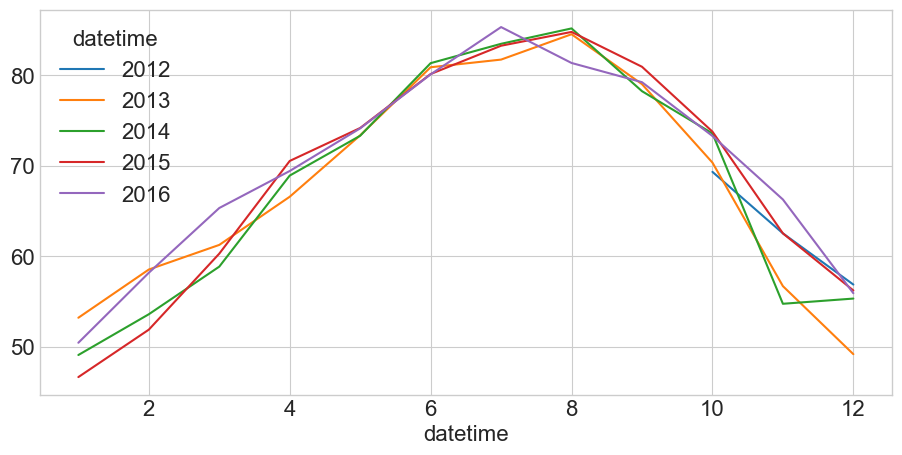

In [42]:
y.groupby([y.index.month, y.index.year]).mean().unstack().plot()

In [43]:
table = y.groupby([y.index.month, y.index.year]).mean().unstack()

In [52]:
table

datetime,2012,2013,2014,2015,2016
datetime,,,,,
1,NaN,53.192333,49.072897,46.631940,50.427347
2,NaN,58.522799,53.579080,51.874683,58.165749
3,NaN,61.244479,58.842459,60.277705,65.323011
4,NaN,66.569717,68.908933,70.526879,69.415316
5,NaN,73.358529,73.311970,74.169747,74.129780
6,NaN,80.885728,81.337658,80.135967,80.097570
7,NaN,81.731819,83.476876,83.264325,85.325640
8,NaN,84.534117,85.178102,84.789859,81.357023
9,NaN,79.016805,78.238621,80.938208,79.233476


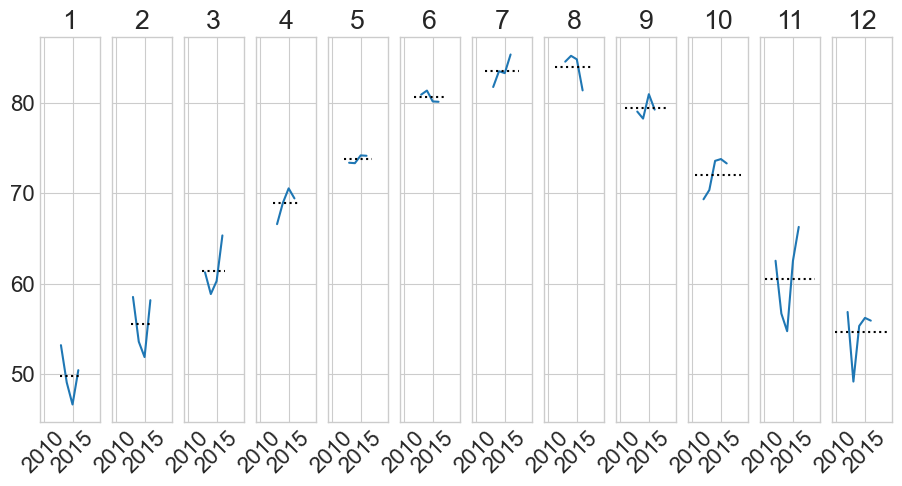

In [44]:
# define a figure and axes for a row of 12 plots
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
# define a for loop that goes through these 12 axis objects (one for each month of the year)
# for every ax in our axes, aaaand for every tuple that is :
# a) a row index (month)
# b) a row content (subset)
# (a and b are both returned iteratively by pandas iterrows)
# we take the contents of the row in subset
# and treat it like a series and plot that cross tabulation with the year 
# so we get a line for the average temp of that month for each year
# with an appended line for the mean across all years
for ax, (month, subset) in zip(axs, table.iterrows()):
    # plot the contents of the row, specify the axis it sits on
    subset.plot(ax=ax, title=month)
    # plot our mean line, going from the beginning to the end of the subplot with *ax.get_xlim()
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls=':')
    # negate the outside label by defining it as an empty string
    ax.set(xlabel='')
    # rotate my years
    ax.tick_params('x', rotation=45)

In [45]:
train['y_plus_1'] = train.temp.shift(-1)

In [46]:
train.head()

,temp,weekday,y_plus_1
datetime,,,
2012-10-01 13:00:00,61.052000,Monday,61.076568
2012-10-01 14:00:00,61.076568,Monday,61.139294
2012-10-01 15:00:00,61.139294,Monday,61.202020
2012-10-01 16:00:00,61.202020,Monday,61.264747
2012-10-01 17:00:00,61.264747,Monday,61.327473


In [64]:
train.shape

(37259, 3)

In [62]:
weekly_resample = train.temp.resample('W').mean().reset_index()
weekly_resample['y_plus_one'] = weekly_resample.temp.shift(-1)

In [63]:
weekly_resample

,datetime,temp,y_plus_one
0,2012-10-07,70.595201,70.152821
1,2012-10-14,70.152821,71.138375
2,2012-10-21,71.138375,71.230464
3,2012-10-28,71.230464,63.510554
4,2012-11-04,63.510554,68.482625
...,...,...,...
217,2016-12-04,59.062094,48.163625
218,2016-12-11,48.163625,55.979132
219,2016-12-18,55.979132,56.073143
220,2016-12-25,56.073143,65.640625


In [69]:
weekly_resample.temp

0      70.595201
1      70.152821
2      71.138375
3      71.230464
4      63.510554
         ...    
217    59.062094
218    48.163625
219    55.979132
220    56.073143
221    65.640625
Name: temp, Length: 222, dtype: float64

In [70]:
weekly_resample.y_plus_one

0      70.152821
1      71.138375
2      71.230464
3      63.510554
4      68.482625
         ...    
217    48.163625
218    55.979132
219    56.073143
220    65.640625
221          NaN
Name: y_plus_one, Length: 222, dtype: float64

[Text(0.5, 0, 'Temp at Time'), Text(0, 0.5, 'Temp at Time Plus One Hour')]

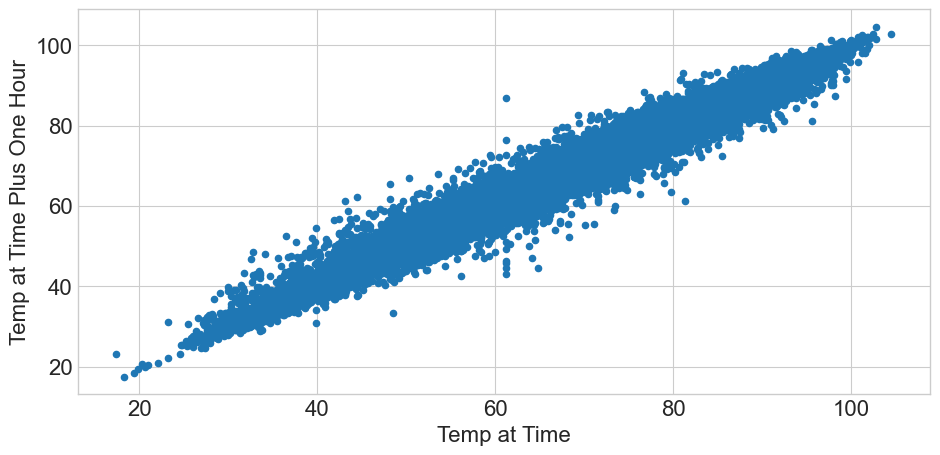

In [47]:
train.plot.scatter(x='temp', 
                   y='y_plus_1').set(
    xlabel='Temp at Time', 
    ylabel='Temp at Time Plus One Hour')

In [48]:
weekly = train.resample('W').temp.mean()

In [49]:
weekly = weekly.reset_index()

In [50]:
weekly['the_next_week'] = weekly.temp.shift(-1)

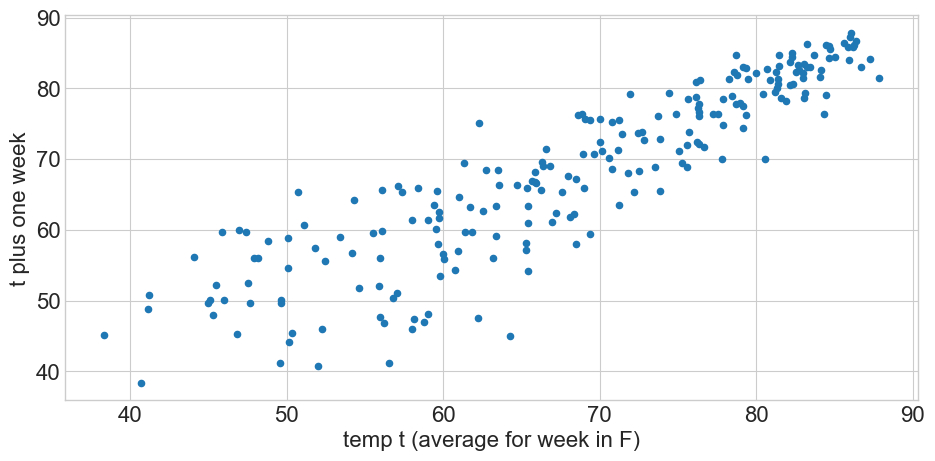

In [51]:
weekly.plot.scatter(x='temp', 
                   y='the_next_week').set(
    xlabel='temp t (average for week in F)', 
    ylabel='t plus one week')
plt.show()

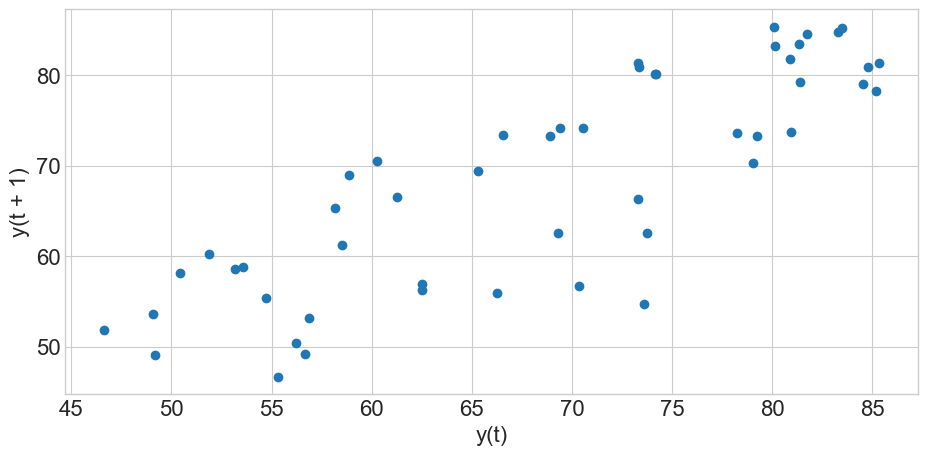

In [68]:
# pandas can automatically make a lag plot for us
# we just need to feed in a series (which we can aggregate with a resample if we want)
# and how much we want the lag to be
pd.plotting.lag_plot(train.temp.resample('M').mean(), lag=1)
plt.show()

### Autocorrelation
 - How does thing relate to same thing but in future?

In [73]:
weekly = weekly_resample.set_index('datetime')

In [74]:
weekly.columns = ['this_week', 'next_week']

In [75]:
weekly.head()

,this_week,next_week
datetime,,
2012-10-07,70.595201,70.152821
2012-10-14,70.152821,71.138375
2012-10-21,71.138375,71.230464
2012-10-28,71.230464,63.510554
2012-11-04,63.510554,68.482625


In [76]:
weekly.tail(2)

,this_week,next_week
datetime,,
2016-12-25,56.073143,65.640625
2017-01-01,65.640625,NaN


In [77]:
# because I shifted out one week in the scope of this examination, 
# I need to account for the NaN that the shift in lag did to my next_week column
# I'm accomplishing this by specifying that I want everything but the last element in my series
lag = 1
weekly.this_week.iloc[:-1].tail()

datetime
2016-11-27    63.402382
2016-12-04    59.062094
2016-12-11    48.163625
2016-12-18    55.979132
2016-12-25    56.073143
Name: this_week, dtype: float64

In [78]:
lag = 12
weekly.this_week.iloc[:-lag].tail()

datetime
2016-09-11    81.390821
2016-09-18    81.364473
2016-09-25    80.557752
2016-10-02    69.992981
2016-10-09    75.692021
Name: this_week, dtype: float64

In [80]:
from scipy import stats

In [89]:
# weekly temp on average:
weekly = train.resample('W')[['temp']].mean()
# based on the aggregate of week, 
# I'm going to build out a Series of r values
# based on pairs of series defined by a lag shift
s = pd.Series(
    {
        # key == lag number
        # value == pearson's r from the relationship between
        # the present week and however much we shift out
        lag: stats.pearsonr(
            weekly.temp.iloc[:-lag],
            weekly.temp.shift(-lag).dropna())[0]
        # for every shift in range 1 to however long we go out
        for lag in range(1, 52 * 3)
    }) # wrapped as a Series
    

In [88]:
s

1      4.796661e-81
2      2.917452e-66
3      4.942754e-50
4      2.391173e-43
5      7.421220e-34
           ...     
151    1.508426e-08
152    9.488284e-12
153    6.150883e-13
154    6.588324e-17
155    4.991218e-17
Length: 155, dtype: float64

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

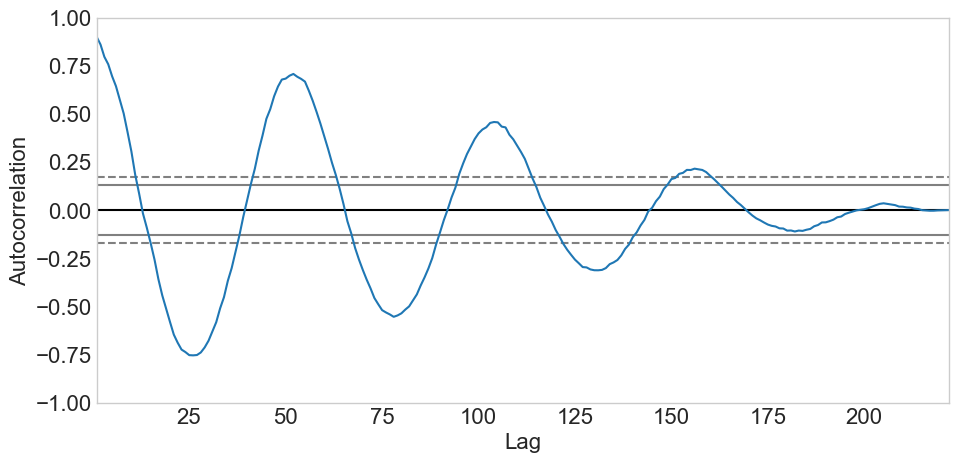

In [90]:
pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())

## Seasonal Decomposition

In [109]:
y = train.temp.resample('M').mean()

In [110]:
result = sm.tsa.seasonal_decompose(y)

In [111]:
result.observed

datetime
2012-10-31    69.318705
2012-11-30    62.521575
2012-12-31    56.860014
2013-01-31    53.192333
2013-02-28    58.522799
2013-03-31    61.244479
2013-04-30    66.569717
2013-05-31    73.358529
2013-06-30    80.885728
2013-07-31    81.731819
2013-08-31    84.534117
2013-09-30    79.016805
2013-10-31    70.343832
2013-11-30    56.686028
2013-12-31    49.165310
2014-01-31    49.072897
2014-02-28    53.579080
2014-03-31    58.842459
2014-04-30    68.908933
2014-05-31    73.311970
2014-06-30    81.337658
2014-07-31    83.476876
2014-08-31    85.178102
2014-09-30    78.238621
2014-10-31    73.567252
2014-11-30    54.735951
2014-12-31    55.311824
2015-01-31    46.631940
2015-02-28    51.874683
2015-03-31    60.277705
2015-04-30    70.526879
2015-05-31    74.169747
2015-06-30    80.135967
2015-07-31    83.264325
2015-08-31    84.789859
2015-09-30    80.938208
2015-10-31    73.766466
2015-11-30    62.519181
2015-12-31    56.207118
2016-01-31    50.427347
2016-02-29    58.165749
2016-03

In [112]:
result.trend

datetime
2012-10-31          NaN
2012-11-30          NaN
2012-12-31          NaN
2013-01-31          NaN
2013-02-28          NaN
2013-03-31          NaN
2013-04-30    69.022432
2013-05-31    68.821998
2013-06-30    68.258237
2013-07-31    67.765981
2013-08-31    67.388350
2013-09-30    67.082278
2013-10-31    67.079661
2013-11-30    67.175188
2013-12-31    67.192079
2014-01-31    67.283620
2014-02-28    67.383163
2014-03-31    67.377571
2014-04-30    67.479456
2014-05-31    67.532512
2014-06-30    67.707364
2014-07-31    67.861762
2014-08-31    67.689039
2014-09-30    67.677824
2014-10-31    67.805041
2014-11-30    67.908196
2014-12-31    67.893866
2015-01-31    67.834939
2015-02-28    67.809906
2015-03-31    67.906212
2015-04-30    68.026996
2015-05-31    68.359597
2015-06-30    68.721202
2015-07-31    68.916648
2015-08-31    69.336918
2015-09-30    69.809267
2015-10-31    69.973173
2015-11-30    69.925192
2015-12-31    69.921927
2016-01-31    70.006215
2016-02-29    69.949069
2016-03

In [113]:
result.seasonal

datetime
2012-10-31     4.379986
2012-11-30   -10.249045
2012-12-31   -14.667779
2013-01-31   -19.557436
2013-02-28   -13.734115
2013-03-31    -6.751777
2013-04-30     0.418775
2013-05-31     5.225762
2013-06-30    12.068459
2013-07-31    14.749637
2013-08-31    16.802684
2013-09-30    11.314849
2013-10-31     4.379986
2013-11-30   -10.249045
2013-12-31   -14.667779
2014-01-31   -19.557436
2014-02-28   -13.734115
2014-03-31    -6.751777
2014-04-30     0.418775
2014-05-31     5.225762
2014-06-30    12.068459
2014-07-31    14.749637
2014-08-31    16.802684
2014-09-30    11.314849
2014-10-31     4.379986
2014-11-30   -10.249045
2014-12-31   -14.667779
2015-01-31   -19.557436
2015-02-28   -13.734115
2015-03-31    -6.751777
2015-04-30     0.418775
2015-05-31     5.225762
2015-06-30    12.068459
2015-07-31    14.749637
2015-08-31    16.802684
2015-09-30    11.314849
2015-10-31     4.379986
2015-11-30   -10.249045
2015-12-31   -14.667779
2016-01-31   -19.557436
2016-02-29   -13.734115
2016-03

In [114]:
result.resid

datetime
2012-10-31         NaN
2012-11-30         NaN
2012-12-31         NaN
2013-01-31         NaN
2013-02-28         NaN
2013-03-31         NaN
2013-04-30   -2.871490
2013-05-31   -0.689231
2013-06-30    0.559032
2013-07-31   -0.783799
2013-08-31    0.343083
2013-09-30    0.619679
2013-10-31   -1.115815
2013-11-30   -0.240116
2013-12-31   -3.358989
2014-01-31    1.346713
2014-02-28   -0.069968
2014-03-31   -1.783336
2014-04-30    1.010702
2014-05-31    0.553695
2014-06-30    1.561835
2014-07-31    0.865477
2014-08-31    0.686379
2014-09-30   -0.754052
2014-10-31    1.382226
2014-11-30   -2.923200
2014-12-31    2.085737
2015-01-31   -1.645563
2015-02-28   -2.201109
2015-03-31   -0.876731
2015-04-30    2.081109
2015-05-31    0.584387
2015-06-30   -0.653694
2015-07-31   -0.401960
2015-08-31   -1.349743
2015-09-30   -0.185908
2015-10-31   -0.586693
2015-11-30    2.843033
2015-12-31    0.952970
2016-01-31   -0.021432
2016-02-29    1.950795
2016-03-31    2.339785
2016-04-30   -0.647363
20

In [115]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'residual': result.resid})

In [116]:
decomposition

,y,trend,seasonal,residual
datetime,,,,
2012-10-31,69.318705,NaN,4.379986,NaN
2012-11-30,62.521575,NaN,-10.249045,NaN
2012-12-31,56.860014,NaN,-14.667779,NaN
2013-01-31,53.192333,NaN,-19.557436,NaN
2013-02-28,58.522799,NaN,-13.734115,NaN
2013-03-31,61.244479,NaN,-6.751777,NaN
2013-04-30,66.569717,69.022432,0.418775,-2.871490
2013-05-31,73.358529,68.821998,5.225762,-0.689231
2013-06-30,80.885728,68.258237,12.068459,0.559032


<Axes: xlabel='datetime'>

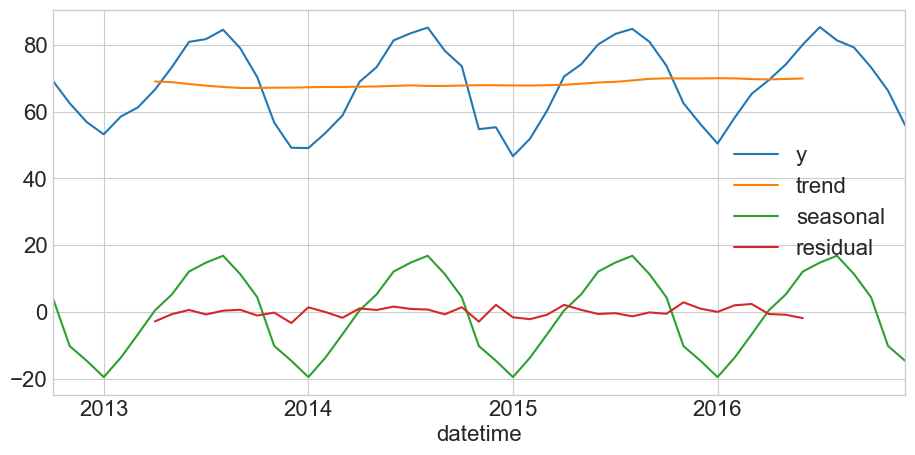

In [117]:
decomposition.plot()

### Area plots:

In [118]:
# what if we want to see proportionally
# what days tend to be over time by a defined category:
# in this case, something like cold, cool, warm, hot

In [120]:
train['temp_bin'] = pd.qcut(train.temp, 4, labels=['cold','cool','warm','hot'])

In [121]:
train.head()

,temp,weekday,y_plus_1,temp_bin
datetime,,,,
2012-10-01 13:00:00,61.052000,Monday,61.076568,cool
2012-10-01 14:00:00,61.076568,Monday,61.139294,cool
2012-10-01 15:00:00,61.139294,Monday,61.202020,cool
2012-10-01 16:00:00,61.202020,Monday,61.264747,cool
2012-10-01 17:00:00,61.264747,Monday,61.327473,cool


In [122]:
train = train.drop(columns=['weekday','y_plus_1'])

In [123]:
train.head(3)

,temp,temp_bin
datetime,,
2012-10-01 13:00:00,61.052000,cool
2012-10-01 14:00:00,61.076568,cool
2012-10-01 15:00:00,61.139294,cool


In [129]:
# what do examinations on the temp bins look like?
# If I want to examine how many records that I have
# that fit in each temperature bin based on a time aggregate (like month)
# then I can do a two-layer aggergation using a combination
# of a conventional groupby and a resample
# I'm using size here to give a Series, Count does the thing similarly across
# all columns
train.groupby('temp_bin').resample('M').size()

pandas.core.series.Series

In [136]:
124 / (124 + 235 + 231 + 141)

0.16963064295485636

In [138]:
.169631 + .321477 + .316005 + .192886

0.999999

In [139]:
# let's talk about unstack again
# if we groupby the temp bin,
# and also resample by the month
# and get the number of records through size
# then unstack that to get the crosstab between bin and month:
# we could get the proportion of that value over all the rows values
train.groupby('temp_bin').resample('M').size().unstack(0).apply(
    lambda row: row / row.sum() ,axis=1).head()


temp_bin,cold,cool,warm,hot
datetime,,,,
2012-10-31,0.169631,0.321477,0.316005,0.192886
2012-11-30,0.365278,0.418056,0.141667,0.075000
2012-12-31,0.467742,0.422043,0.102151,0.008065
2013-01-31,0.641129,0.291667,0.059140,0.008065
2013-02-28,0.438988,0.489583,0.065476,0.005952


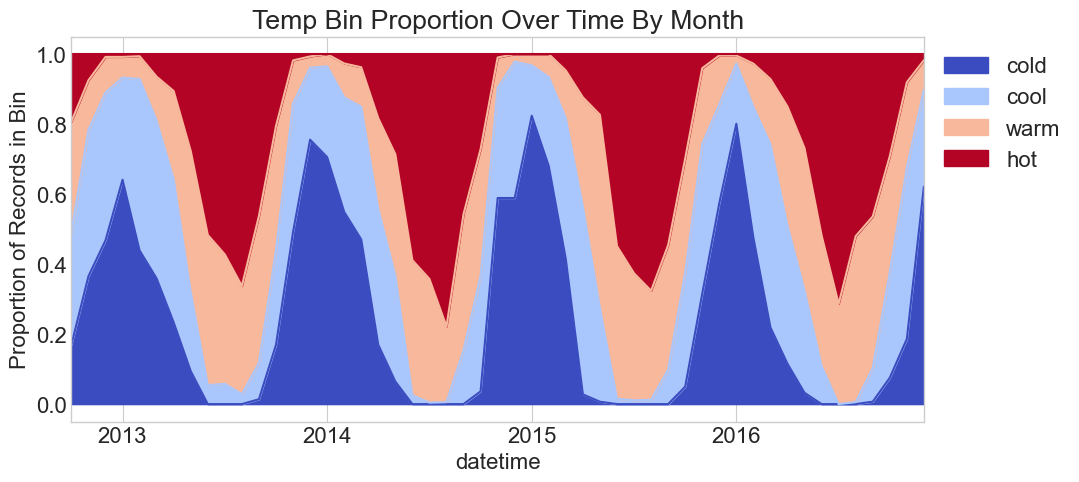

In [150]:
ax = (train.groupby('temp_bin'
             ).resample('M'
                       ).size(
).unstack(0).apply(
    lambda row: row / row.sum() ,axis=1
).plot.area(
    title='Temp Bin Proportion Over Time By Month',
    ylabel='Proportion of Records in Bin',
    colormap='coolwarm'
))
ax.legend(
         bbox_to_anchor=(1,1))
